In [230]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
# from scipy.integrate import odeint
# from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import pandas as pd

header =['SDSS', 'per', 'vtype']
CVs = pd.read_fwf('tablea1.dat', names=header, index_col=False, colspecs=[(0,23), (76,88), (144,157)])
CVs = CVs.dropna(subset=['per'])
CVs['per'] = CVs['per']*24*60

non_polars = CVs
non_polars = non_polars[non_polars['vtype'].str.startswith('Polar')==False]
non_polars = non_polars[non_polars['vtype'].str.startswith('PREP')==False]
non_polars = non_polars[non_polars['vtype'].str.startswith('IP')==False]

non_polars_arr = non_polars['per'].to_numpy()


def LogL(lower_bound, upper_bound, periods, alfa):
    masked_periods = ma.masked_outside(periods, lower_bound, upper_bound)
    masked_periods = masked_periods.compressed()
    likelihood = -1000
    new_likelihood = 0
    res_period = 0
    for period in masked_periods:    
        N0 = np.count_nonzero(period > masked_periods)
        N1 = np.count_nonzero(period < masked_periods)
        N = N1 + N0
        delta0 = period - lower_bound
        delta1 = - period + upper_bound
        summand0 = N0 * np.log((N0 + alfa - 1) / (delta0 * (N + 2 * alfa - 1)))
        summand1 = N1 * np.log((N1 + alfa - 1) / (delta1 * (N + 2 * alfa - 1)))
        new_likelihood = summand0 + summand1
        if new_likelihood > likelihood:
            likelihood = new_likelihood
            res_period = period
    return res_period
# fig, axes = plt.subplots(1, 1, figsize=(5,5))
# axes.hist(non_polars['per'], bins=20)
# plt.show()
# print(non_polars_arr)
# LogL_vals = LogL(100, 300, non_polars_arr, 2)
print(LogL(150, 230, non_polars_arr, 1+1e-6))
# print(non_polars[non_polars.isna().any(axis=1)])

KeyboardInterrupt: 

In [134]:
def LogL(lower_bound, upper_bound, periods, alfa):
    likelihood = -1000
    new_likelihood = 0
    res_period = 0
    res_periods = np.array([])
    for lower in lower_bound:
        for upper in upper_bound:
            masked_periods = ma.masked_outside(periods, lower, upper)
            masked_periods = masked_periods.compressed()
            for period in masked_periods:
                N0 = np.count_nonzero(period > masked_periods)
                N1 = np.count_nonzero(period < masked_periods)
                N = N1 + N0
                delta0 = period - lower
                delta1 = - period + upper
                summand0 = N0 * np.log((N0 + alfa - 1) / (delta0 * (N + 2 * alfa - 1)))
                summand1 = N1 * np.log((N1 + alfa - 1) / (delta1 * (N + 2 * alfa - 1)))
                new_likelihood = summand0 + summand1
                if new_likelihood > likelihood:
                    likelihood = new_likelihood
                    res_period = period
            res_periods = np.append(res_periods, res_period)
    return res_periods

lower_bounds = np.arange(150, 170, 1)
upper_bounds = np.arange(230, 250, 1)
vals = LogL(lower_bounds, upper_bounds, non_polars_arr, 1+1e-6)


In [198]:
vals.reshape(20,20)

array([[168.624  , 168.624  , 168.624  , 168.624  , 168.624  , 168.624  ,
        168.624  , 168.624  , 168.624  , 168.624  , 168.624  , 168.624  ,
        168.624  , 168.624  , 168.624  , 168.624  , 168.624  , 168.624  ,
        168.624  , 168.624  ],
       [168.624  , 168.624  , 168.624  , 168.624  , 168.624  , 168.624  ,
        168.624  , 168.624  , 168.624  , 168.624  , 168.624  , 168.624  ,
        168.624  , 168.624  , 168.624  , 168.624  , 168.624  , 168.624  ,
        168.624  , 168.624  ],
       [168.624  , 168.624  , 168.624  , 168.624  , 168.624  , 168.624  ,
        168.624  , 168.624  , 168.624  , 168.624  , 168.624  , 168.624  ,
        168.624  , 168.624  , 168.624  , 168.624  , 168.624  , 168.624  ,
        168.624  , 168.624  ],
       [168.624  , 168.624  , 168.624  , 168.624  , 168.624  , 168.624  ,
        168.624  , 168.624  , 168.624  , 168.624  , 168.624  , 168.624  ,
        168.624  , 168.624  , 168.624  , 168.624  , 168.624  , 168.624  ,
        168.624  , 

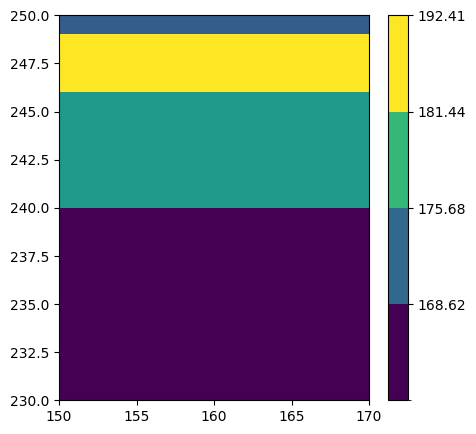

In [227]:
import matplotlib as mpl
fig, ax = plt.subplots(1, 1, figsize=(5,5))
cmap = mpl.cm.viridis
bounds = [0, 168.624, 175.68, 181.44, 192.40704]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='neither')
Im = ax.imshow(vals.reshape(20,20), extent=[150, 170, 230, 250], aspect='auto', origin='lower') 
# ax.imshow(vals.reshape(20,20), extent=[150, 170, 230, 250], aspect='auto')
# cax = fig.colorbar(Im, ax=ax, extend='both')
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_ticks([168.624, 175.68, 181.44, 192.40704])